# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [83]:
n = 64 
x = np.linspace(0,1,n) + np.random.rand(4,n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0,1,n) + np.random.rand(n)-1 

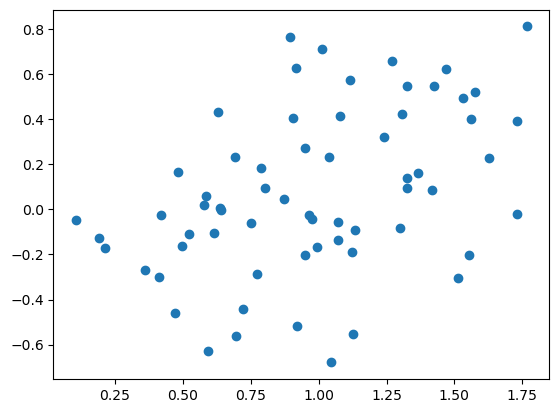

In [10]:
# x1 vs. y plot 
plt.scatter(x.T[0],y)

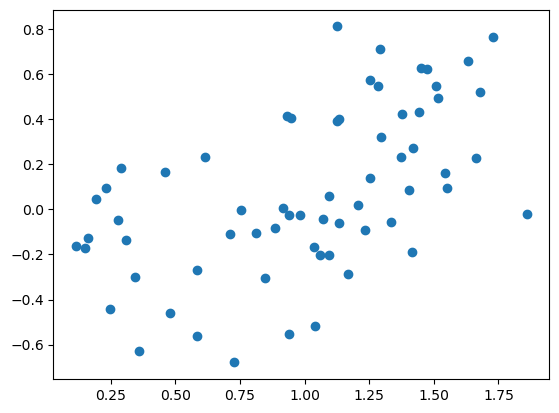

In [12]:
# x2 vs. y plot 
plt.scatter(x.T[1],y)

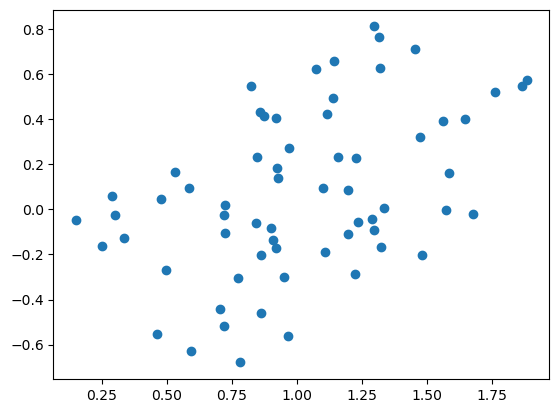

In [13]:
# x3 vs. y plot 
plt.scatter(x.T[2],y)

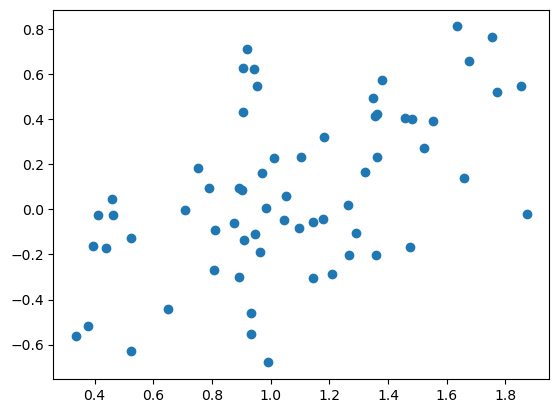

In [14]:
# x4 vs. y plot 
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [84]:
left = np.linalg.inv(np.dot(x.T,x))
right = np.dot(y.T,x)
np.dot(left,right)

array([ 0.00311181,  0.36604476,  0.18371444,  0.2392388 , -0.8502421 ])

In [85]:
beta = np.linalg.lstsq(x,y)[0]
beta

/var/folders/w7/z24rtcgx3zz1h56l5p6pyf4h0000gn/T/ipykernel_84995/2644334133.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x,y)[0]


array([ 0.00311181,  0.36604476,  0.18371444,  0.2392388 , -0.8502421 ])

In [88]:
pred = np.dot(x,beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

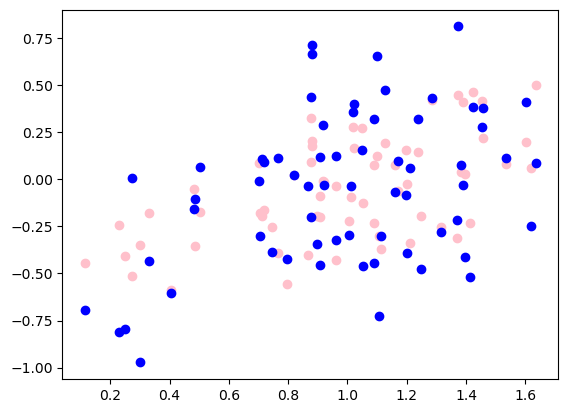

In [89]:
# x1 vs. y plot (w/ predictor)
plt.scatter(x.T[0], pred, c='pink')
plt.scatter(x.T[0],y,c='b')

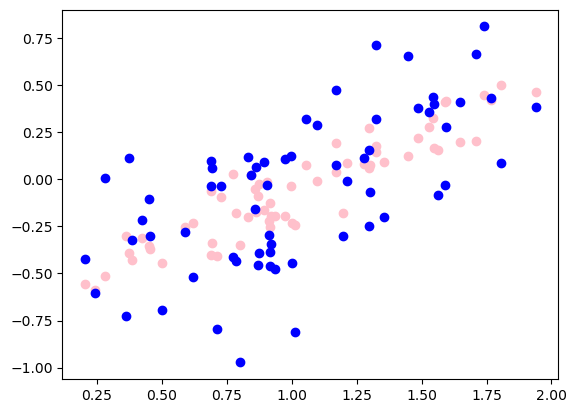

In [93]:
# x1 vs. y plot (w/predictor)
plt.scatter(x.T[1], pred, c='pink')
plt.scatter(x.T[1],y, c='b')

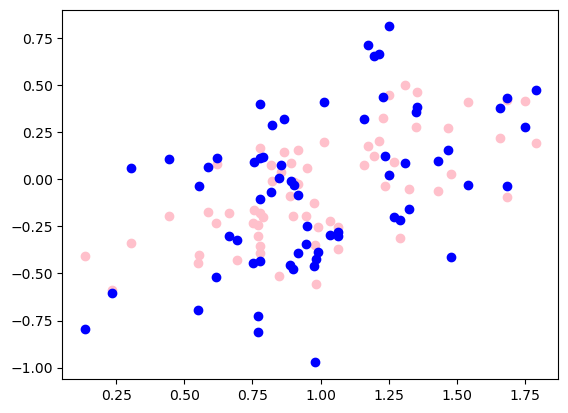

In [94]:
# x1 vs. y plot (w/predictor)
plt.scatter(x.T[2], pred, c='pink')
plt.scatter(x.T[2],y, c='b')

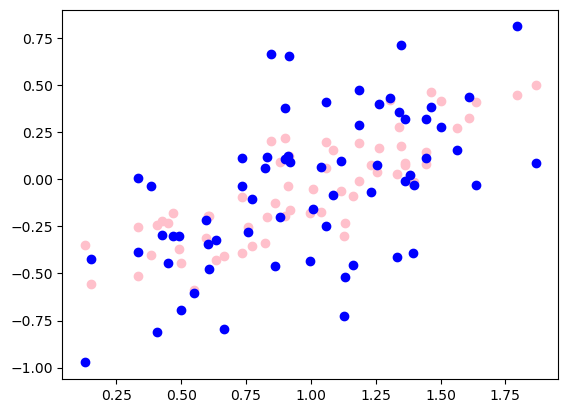

In [95]:
# x1 vs. y plot (w/predictor)
plt.scatter(x.T[3], pred, c='pink')
plt.scatter(x.T[3],y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt

path = os.getcwd()
print(path)

/Users/sanmirkem/Machine Learning/Neural Networks/Module 3


In [49]:
fn = "/Users/sanmirkem/Desktop/mlnn/data/Credit.csv"

credit = pd.read_csv(fn)
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [191]:
columns = ['Limit','Income','Age','Education']
# I figure age and education play a role into someone's credit habits and credit history.
X = credit[columns].values
X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[3.60600e+03, 1.48910e+01, 3.40000e+01, 1.10000e+01, 1.00000e+00],
       [6.64500e+03, 1.06025e+02, 8.20000e+01, 1.50000e+01, 1.00000e+00],
       [7.07500e+03, 1.04593e+02, 7.10000e+01, 1.10000e+01, 1.00000e+00],
       ...,
       [4.17100e+03, 5.78720e+01, 6.70000e+01, 1.20000e+01, 1.00000e+00],
       [2.52500e+03, 3.77280e+01, 4.40000e+01, 1.30000e+01, 1.00000e+00],
       [5.52400e+03, 1.87010e+01, 6.40000e+01, 7.00000e+00, 1.00000e+00]])

In [192]:
Y = credit['Rating']
Y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [193]:
left2 = np.linalg.inv(np.dot(X.T,X))
right2 = np.dot(Y.T,X)
np.dot(left2,right2)

array([ 6.65859593e-02,  1.74813021e-02,  2.04045669e-02, -3.28829977e-01,
        4.21119381e+01])

In [194]:
Beta = np.linalg.lstsq(X,Y)[0]
Beta

/var/folders/w7/z24rtcgx3zz1h56l5p6pyf4h0000gn/T/ipykernel_84995/1734371343.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Beta = np.linalg.lstsq(X,Y)[0]


array([ 6.65859593e-02,  1.74813021e-02,  2.04045669e-02, -3.28829977e-01,
        4.21119381e+01])

In [195]:
Pred = np.dot(X,Beta)

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

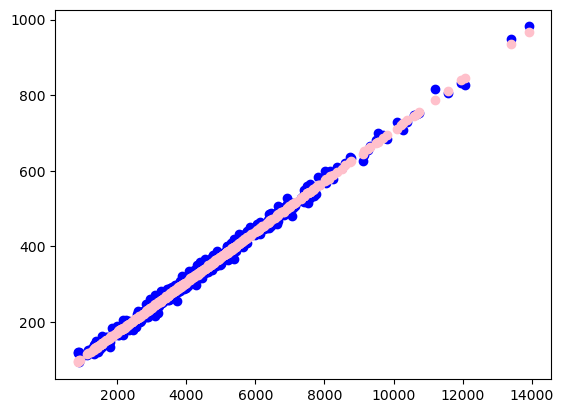

In [197]:
plt.scatter(X.T[0],Y,c='b')
plt.scatter(X.T[0], Pred, c='pink')

#it looks like 
# I am not sure if I need to standardize anything? This does not feel correct.

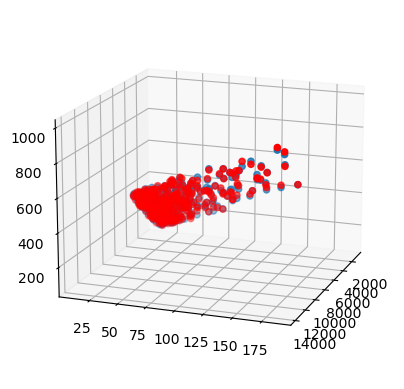

In [198]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.view_init(16,20)
ax.scatter(X.T[0], X.T[1], Pred, zdir='z')
ax.scatter(X.T[0], X.T[1], Y, zdir='z',c='r')